## Второе задание по вычислительной математике. Решение ОДУ и их систем.

In [1]:
#Подключение библиотек
import numpy as np
from scipy.integrate import odeint  # 用from语法的，直接调用，不需要前面的包
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl  # pylab 和 pyplot 有相近的功能
from scipy import integrate
import matplotlib.pyplot as plt

# №1.Линейные системы уравнений. Устойчивость численных методов.
Решить численно задачу о колебаниях в системе, где и возвращающая сила, и коэффициент вязкого трения убывают со временем (уравнение Эйлера):
x''+ 3x'/t + x/t^2 = 0
t:[1,T], x(1)=1, x'(1)=1

А. Найти точное решение системы Указание. Будем искать точное решение в виде x = t, где , вообще говоря, комплексное

In [ ]:
#y"+a*y'+b*y=0 
#a=3/x, b=1/x^2
from scipy.integrate import odeint
from pylab import *
def deriv(y,x):        # 返回值是y和y的导数组成的数组
    a = 3
    b = 1
    return array([ y[1], a*y[0]/x+b*y[1]/(x*x) ])
time = linspace(1.0,10.0,900)
yinit = array([1,100])     # 初值
y = odeint(deriv,yinit,time)
 
figure()
plot(time,y[:,0],label='y')    #y[:,0]即返回值的第一列，是y的值。label是为了显示legend用的。
plot(time,y[:,1],label="y'")     #y[:,1]即返回值的第二列，是y’的值
xlabel('t')
ylabel('y')
legend()
show()

Б. Используя численные методы Эйлера (явный, неявный, с центральной точкой), методы трапеций, явные методы Адамса порядка 3, 4 и Дормана-Принса, получить численные решения с шагом 0,1 для Т = 1,10,100,1000. Объяснить полученные результаты. Уменьшить  вдвое. Объяснить полученные результаты.

In [ ]:
import numpy as np
from scipy.integrate import odeint
#二阶微分方程
def diff_equation(y_list,x):
    y,z=y_list
    return np.array([z,-(3*z/x+y/(x*x))])
x=np.linspace(1,10,num=90)
y0=[1,1]#y(1)=1,y'(1)=1
result=odeint(diff_equation,y0,x)
plt.plot(x,result[:,0],label='y')#y的图像
plt.plot(x,result[:,1],label='z')#z的图像，也就是y'的图像
plt.legend()
plt.grid()
plt.show()

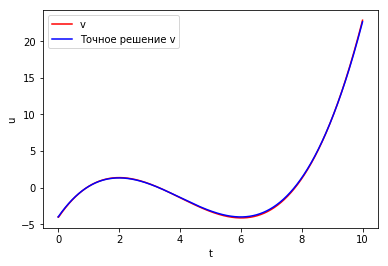

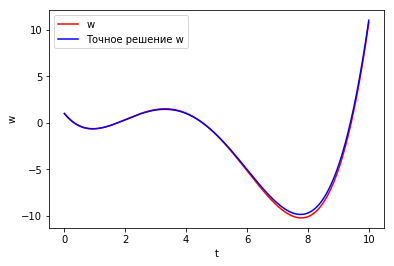

In [6]:
def euler(f,g,x0,y0,T,h):
    x=[x0]
    y=[y0]
    for i in range(1, h+1):
        x.append(x[-1]+T/h*f((i)*T/h,x[-1],y[-1] ))
        y.append(y[-1]+T/h*g((i)*T/h,x[-1],y[-1]))
    return x,y

v, w = euler(f, g, v0, w0, T, h) 


t = np.linspace(0, T, h+1) 


plt.xlabel('t')
plt.ylabel('u')
plt.plot(t, v, "red", label="v")
plt.plot(t, true_v(t), "blue", label="Точное решение v")
plt.legend()
plt.show()
plt.xlabel('t')
plt.ylabel('w')
plt.plot(t, w, "red", label="w")
plt.plot(t, true_w(t), "blue", label="Точное решение w")
plt.legend()
plt.show()

Г. Исследовать методы Адамса порядка 3 и трапеций для данной задачи на устойчивость. Получить априорно оценку для шагов, при которых метод устойчив.

Д. Проверить полученные оценки границы устойчивости для каждого метода Рунге-Кутты. Опишите процесс развития неустойчивости.
Е. Устойчив ли метод Эйлера с центральной точкой? Объяснить полученные с его помощью результаты.

Метод Рунге-Кутты 4 порядка.

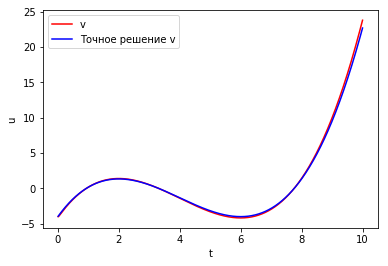

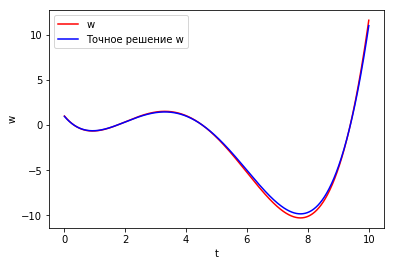

In [3]:
def rk4(f, g, x0, y0, T, h):
    x = [x0]
    y = [y0]
    for i in range(1, h+1):
        k1 = f((i)*T/h, x[-1], y[-1])
        q1 = g((i)*T/h, x[-1], y[-1])
        
        k2 = f((i)*T/h + T/h/2, x[-1] + T/h/2*k1, y[-1] + T/h/2*q1)
        q2 = g((i)*T/h + T/h/2, x[-1] + T/h/2*k1, y[-1] + T/h/2*q1)
        
        k3 = f((i)*T/h + T/h/2, x[-1] + T/h/2*k2, y[-1] + T/h/2*q2)
        q3 = g((i)*T/h + T/h/2, x[-1] + T/h/2*k2, y[-1] + T/h/2*q2)
        
        k4 = f((i)*T/h + T/h, x[-1] + T/h*k3, y[-1] + T/h*q3)
        q4 = g((i)*T/h + T/h, x[-1] + T/h*k3, y[-1] + T/h*q3)
        
        x.append(x[-1] + T/h/6*(k1 + 2*k2 + 2*k3 + k4))
        y.append(y[-1] + T/h/6*(q1 + 2*q2 + 2*q3 + q4))
    return x, y

T = 10
h = 1000 

v, w = rk4(f, g, v0, w0, T, h)
t = np.linspace(T/h, T, h+1) # , ,
plt.xlabel('t')
plt.ylabel('u')
plt.plot(t, v, "red", label="v")
plt.plot(t, true_v(t), "blue", label="Точное решение v")
plt.legend()
plt.show()
plt.xlabel('t')
plt.ylabel('w')
plt.plot(t, w, "red", label="w")
plt.plot(t, true_w(t), "blue", label="Точное решение w")
plt.legend()
plt.show()

Метод Рунге-Кутты 3 порядка.

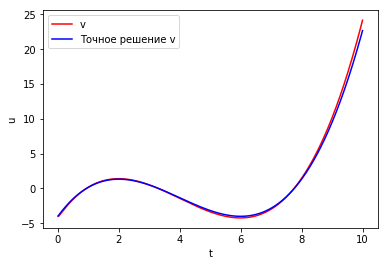

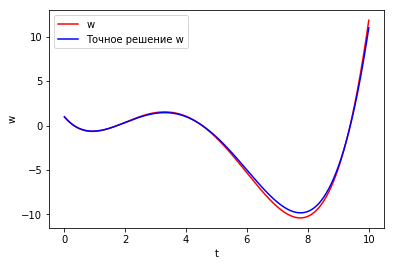

In [4]:
def rk3(f, g, x0, y0, T, h): 
    x = [x0] 
    y = [y0] 

    for i in range(1, h+1): 
        k1 = f((i)*T/h, x[-1], y[-1]) 
        q1 = g((i)*T/h, x[-1], y[-1])
        
        k2 = f((i)*T/h + T/h/2, x[-1] + T/h/2*k1, y[-1] + T/h/2*q1) 
        q2 = g((i)*T/h + T/h/2, x[-1] + T/h/2*k1, y[-1] + T/h/2*q1) 
        
        k3 = f((i)*T/h + T/h, x[-1] + T/h/2*k2, y[-1] + T/h/2*q2) 
        q3 = g((i)*T/h + T/h, x[-1] + T/h/2*k2, y[-1] + T/h/2*q2) 
        

        x.append(x[-1] + T/h/4*(k1 + 2*k2 + k3)) 
        y.append(y[-1] + T/h/4*(q1 + 2*q2 + q3)) 

    return x, y


T = 10
h = 1000

v, w = rk3(f, g, v0, w0, T, h)
t = np.linspace(T/h, T, h+1) 
plt.xlabel('t')
plt.ylabel('u')
plt.plot(t, v, "red", label="v")
plt.plot(t, true_v(t), "blue", label="Точное решение v")
plt.legend()
plt.show()
plt.xlabel('t')
plt.ylabel('w')
plt.plot(t, w, "red", label="w")
plt.plot(t, true_w(t), "blue", label="Точное решение w")
plt.legend()
plt.show()

Метод Рунге-Кутты 2 порядка.

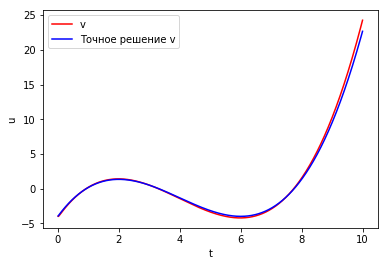

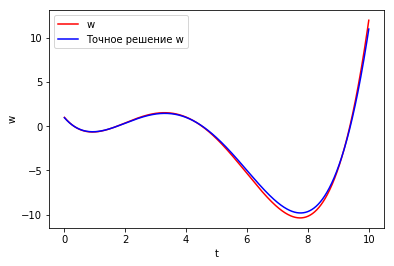

In [5]:
def rk2(f,g,u0,v0,T,h):
    x=[u0]
    y=[v0]
    for i in range(1, h+1):
        k1 = f((i)*T/h, x[-1], y[-1]) 
        q1 = g((i)*T/h, x[-1], y[-1]) 
        
        k2 = f((i)*T/h + T/h/2, x[-1] + T/h/2*k1, y[-1] + T/h/2*q1) 
        q2 = g((i)*T/h + T/h/2, x[-1] + T/h/2*k1, y[-1] + T/h/2*q1) 
        
        x.append(x[-1] + T/h/2*(k1 + k2)) 
        y.append(y[-1] + T/h/2*(q1 + q2))
    return x,y    

T = 10
h = 1000

v, w = rk2(f, g, v0, w0, T, h)
t = np.linspace(T/h, T, h+1) # , ,
plt.xlabel('t')
plt.ylabel('u')
plt.plot(t, v, "red", label="v")
plt.plot(t, true_v(t), "blue", label="Точное решение v")
plt.legend()
plt.show()
plt.xlabel('t')
plt.ylabel('w')
plt.plot(t, w, "red", label="w")
plt.plot(t, true_w(t), "blue", label="Точное решение w")
plt.legend()
plt.show()

Метод Эйлера.

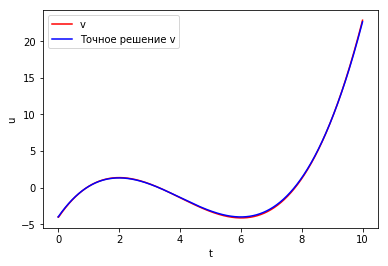

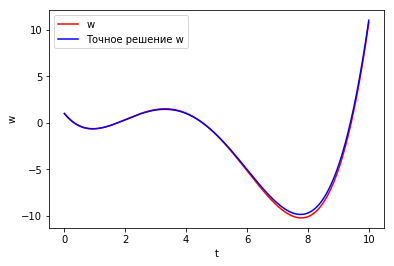

In [6]:
def euler(f,g,x0,y0,T,h):
    x=[x0]
    y=[y0]
    for i in range(1, h+1):
        x.append(x[-1]+T/h*f((i)*T/h,x[-1],y[-1] ))
        y.append(y[-1]+T/h*g((i)*T/h,x[-1],y[-1]))
    return x,y

v, w = euler(f, g, v0, w0, T, h) 


t = np.linspace(0, T, h+1) 


plt.xlabel('t')
plt.ylabel('u')
plt.plot(t, v, "red", label="v")
plt.plot(t, true_v(t), "blue", label="Точное решение v")
plt.legend()
plt.show()
plt.xlabel('t')
plt.ylabel('w')
plt.plot(t, w, "red", label="w")
plt.plot(t, true_w(t), "blue", label="Точное решение w")
plt.legend()
plt.show()

Неявный метод Эйлера.

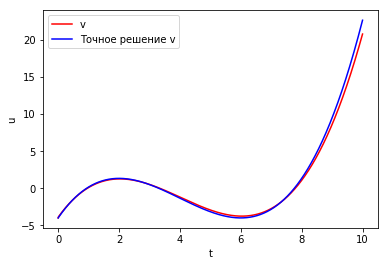

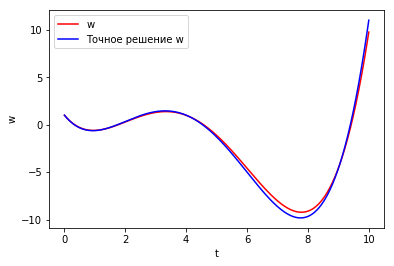

In [7]:
def implicit_euler(h):
    v=[v0]
    w=[w0]
    for i in range(h):
        v = np.append(v,(i*T/h*v[-1]-4*w[-1]*T/h)/(i*T/h+(1-i*T/h)*T/h + 4*(T/h)**2))
        w = np.append(w,w[-1]+T/h*v[i+1]) 
    return v,w    


T = 10
h = 1000
t = np.linspace(0, T, h+1) 

v, w = implicit_euler(h)

plt.xlabel('t')
plt.ylabel('u')
plt.plot(t, v, "red", label="v")
plt.plot(t, true_v(t), "blue", label="Точное решение v")
plt.legend()
plt.show()
plt.xlabel('t')
plt.ylabel('w')
plt.plot(t, w, "red", label="w")
plt.plot(t, true_w(t), "blue", label="Точное решение w")
plt.legend()
plt.show()

### Найдем апостериорные порядки схождения для данных методов

#### Апостериорный порядок сходимости метода Рунге-Кутты 4 порядка.

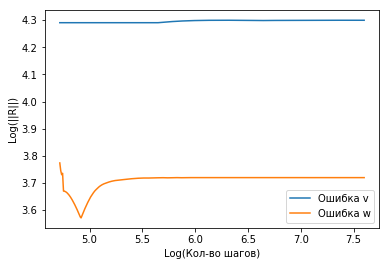

In [99]:
step = [] 
v_error = [] 
w_error = [] 
for segm in reversed(range(100, 2000)): 
    v, w = rk4(f, g, v0, w0, T, segm) 
    t = np.linspace(0, T, segm+1) 
    step.append(m.log(segm))  
    v_error.append(m.log(np.linalg.norm(v - true_v(t), np.inf))) 
    w_error.append(m.log(np.linalg.norm(w - true_w(t), np.inf))) 
    #print(np.linalg.norm(v - true_v(t), np.inf))

plt.ylabel('Log(||R||)')
plt.xlabel('Log(Кол-во шагов)')
plt.plot(step, v_error, label="Ошибка v") 
plt.plot(step, w_error, label="Ошибка w") 
plt.legend()
plt.show()

#### Апостериорный порядок сходимости метода Рунге-Кутты 3 порядка.

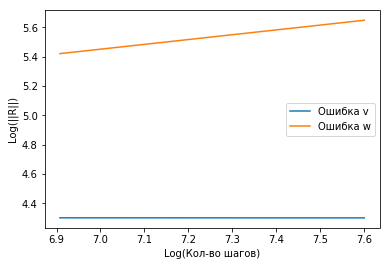

In [98]:
step = [] 
v_error = [] 
w_error = [] 
for segm in reversed(range(1000, 2000)): 
    v, w = rk3(f, g, v0, w0, T, segm) 
    t = np.linspace(0, T, segm+1) 
  
    step.append(m.log(segm))  
    v_error.append(m.log(np.linalg.norm(v - true_v(t), np.inf))) 
    w_error.append(m.log(np.linalg.norm(w - true_w(t), 3))) 
    #print(np.linalg.norm(v - true_v(t), np.inf))

plt.ylabel('Log(||R||)')
plt.xlabel('Log(Кол-во шагов)')
plt.plot(step, v_error, label="Ошибка v") 
plt.plot(step, w_error, label="Ошибка w") 
plt.legend()
plt.show()

#### Апостериорный порядок сходимости метода Рунге-Кутты 2 порядка.

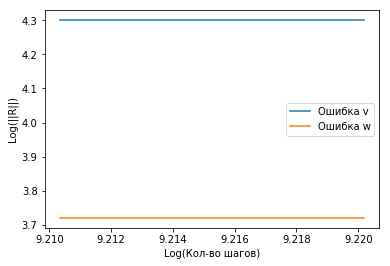

In [97]:
step = [] 
v_error = [] 
w_error = [] 
for segm in reversed(range(10000, 10100)): 
    v, w = rk2(f, g, v0, w0, T, segm) 
    t = np.linspace(0, T, segm+1) 
    step.append(m.log(segm))  
    v_error.append(m.log(np.linalg.norm(v - true_v(t), np.inf))) 
    w_error.append(m.log(np.linalg.norm(w - true_w(t), np.inf))) 
    #print(np.linalg.norm(v - true_v(t), inf))
plt.ylabel('Log(||R||)')
plt.xlabel('Log(Кол-во шагов)')
plt.plot(step, v_error, label="Ошибка v") 
plt.plot(step, w_error, label="Ошибка w") 
plt.legend()
plt.show()

# Апостериорный порядок сходимости метода Эйлера.

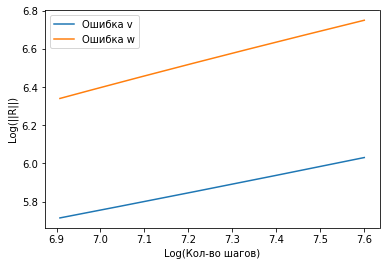

In [96]:
step = [] 
v_error = [] 
w_error = [] 
for segm in reversed(range(1000, 2000)): 
    v, w = euler(f, g, v0, w0,T, segm)
   
    
    t = np.linspace(0, T, segm+1) 
    step.append(m.log(segm))  
    v_error.append(m.log(np.linalg.norm(v - true_v(t), 2))) 
    w_error.append(m.log(np.linalg.norm(w - true_w(t), 2))) 
    #print(np.linalg.norm(v - true_v(t), np.inf))

plt.ylabel('Log(||R||)')
plt.xlabel('Log(Кол-во шагов)')
plt.plot(step, v_error, label="Ошибка v") 
plt.plot(step, w_error, label="Ошибка w") 
plt.legend() 
plt.show()

#### Апостериорный порядок сходимости неявного метода Эйлера.

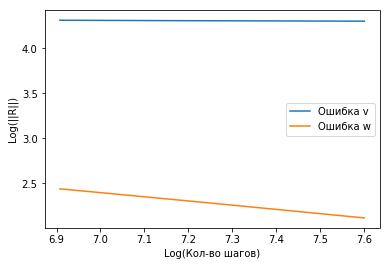

In [94]:
step = [] 
v_error = [] 
w_error = []
T=10
for segm in reversed(range(1000,2000)):    
    v, w = implicit_euler(segm)
    t = np.linspace(0, T, segm+1) 
    step.append(m.log(segm))  
    v_error.append(m.log(np.linalg.norm(v - true_v(t), 2))) 
    w_error.append(m.log(np.linalg.norm(w - true_w(t), 2))) 
plt.ylabel('Log(||R||)')
plt.xlabel('Log(Кол-во шагов)')
plt.plot(step, v_error, label="Ошибка v") 
plt.plot(step, w_error, label="Ошибка w") 
plt.legend() 
plt.show()

# №2.Нелинейная система уравнений
Система Лоренца Конвективные течения в слое жидкости при определенных предположениях можно описывать следующей системой ОДУ (модель Лоренца):



с начальными условиями
		
(Здесь х — одна из компонент скорости, y, z — соответствуют членам разложения температуры в ряд Фурье,  — число Прандтля, r — число Рэлея, b — положительная константа).

1:Методами разных порядков аппроксимации численно решить систему Лоренца:




при    Считаем, что  Объяснить полученные результаты.

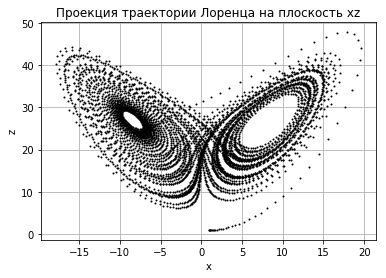

In [4]:
# -*- coding: utf8 -*-
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
s,r,b=10,28,8/3
#other value of b:1,2,10,20
def f(y, t):
 y1, y2, y3 = y
 return [s*(y2-y1),
 -y2+(r-y3)*y1,
 -b*y3+y1*y2]
t = np.linspace(0,50,5001)
y0 = [1,1,1]
[y1,y2,y3]=odeint(f, y0, t, full_output=False).T
plt.plot(y1,y3, color='black', linestyle=' ', marker='.',
markersize=2)
plt.xlabel('x')
plt.ylabel('z')
plt.grid(True)
plt.title("Проекция траектории Лоренца на плоскость xz")
plt.show()

In [ ]:
def lorenz(w, t, p, r, b):
    # w 是矢量，包含（x, y, z）, 三个参数 p,r,b
    # 计算微分量？
    x, y, z = w.tolist()
    # 返回量是lorenz的计算公式
    return p*(y-x), x*(r-z)-y, x*y - b*z


t = np.arange(0, 30, 0.02)  # 时间点
# 调用 ode 对 lorenz进行求解
track1 = odeint(lorenz, (0.0, 1.00, 0.0), t, args=(10.0, 28.0, 3.0))  # odeint,函数名后面的位置，是传入自定义函数的参数
track2 = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 28.0, 3.0))
print(track1)
print(track1[:, 0])  # 取出第0列的意思，因为数组的每一行分别是 x,y,z; 取第0列就是把所有x取出来

вывод1:
Решение системы ДУ лучше рассматривать в проекции на одну из трёх плоскостей. 
Рассматривая изображение на графике во времени, можно предположить, что точка P(x(t), y{t), z(t)) совершает случайное число колебаний то справа, то с слева. 
application:
Для метеорологического приложения системы Лоренца, после случайного числа ясных дней, следует случайное число дождливых дней.

2:Проанализировать ( в зависимости от шага численного интегрирования) при каких временах решения, полученные методами Рунге-Кутты разного порядка аппроксимации, совпадают, а при каких начинают расходится. Объяснить это явление. Почему при этом практически не изменяются картины в проекциях сечения фазового пространства на координатные плоскости?

???тут не понимаю какие признаки нужно рассмотреть

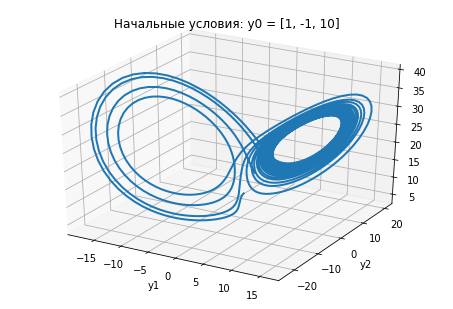

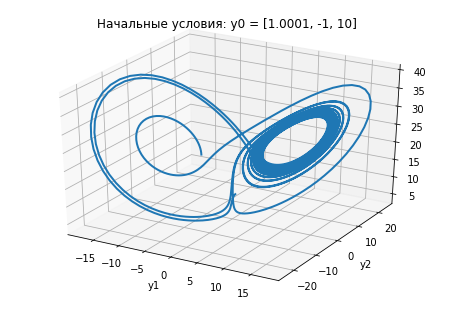

In [5]:
# -*- coding: utf8 -*-
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Создаем функцию правой части системы уравнений.
s,r,b=10,25,3
def f(y, t):
 y1, y2, y3 = y
 return [s*(y2-y1),
 -y2+(r-y3)*y1,
-b*y3+y1*y2]
#Решаем систему ОДУ и строим ее фазовую траекторию
t = np.linspace(0,20,2001)
y0 = [1, -1, 10]
[y1,y2,y3]=odeint(f, y0, t, full_output=False).T
fig = plt.figure(facecolor='white') 
ax=Axes3D(fig)
ax.plot(y1,y2,y3,linewidth=2)
plt.xlabel('y1')
plt.ylabel('y2')
plt.title("Начальные условия: y0 = [1, -1, 10]")
y0 = [1.0001, -1, 10]
[y1,y2,y3]=odeint(f, y0, t, full_output=False).T
fig = plt.figure(facecolor='white') 
ax=Axes3D(fig)
ax.plot(y1,y2,y3,linewidth=2)
plt.xlabel('y1')
plt.ylabel('y2')
plt.title("Начальные условия: y0 = [1.0001, -1, 10]")
plt.show()

вывод2:
Из приведенных графиков следует, что изменение начального условия для с 1,0 до 1,0001 резко меняет характер изменения аттрактора Лоренца.

## Задача№ 3. Особые точки и особые траектории.


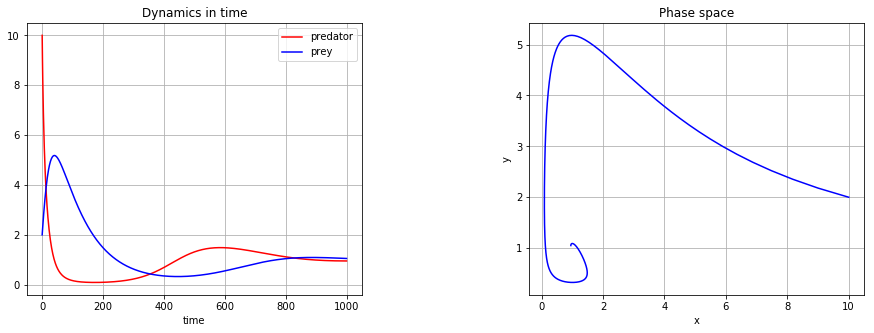

In [10]:
#this is an example of solution ODE,SP-s
import matplotlib.pyplot as plt  
# show plots in notebook  
% matplotlib inline  
  
# define system in terms of separated differential equations  
def f(x,y):  
    return 2*x - x**2 - x*y  
def g(x,y):  
    return - y + x*y  
  
# initialize lists containing values  
x = []  
y = []  
  
#iv1, iv2 = initial values, dt = timestep, time = range  
def sys(iv1, iv2, dt, time):  
# initial values:  
    x.append(iv1)  
    y.append(iv2)  
#z.append(iv3)  
# compute and fill lists  
    for i in range(time):  
        x.append(x[i] + (f(x[i],y[i])) * dt)  
        y.append(y[i] + (g(x[i],y[i])) * dt)  
#z.append(z[i] + (h(x[i],y[i],z[i])) * dt)  
    return x, y  
  
sys(10, 2, 0.01, 1000)  
  
#plot  
fig = plt.figure(figsize=(15,5))  
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)  
ax1 = fig.add_subplot(1,2,1)  
ax2 = fig.add_subplot(1,2,2)  
  
ax1.plot(x, 'r-', label='predator')  
ax1.plot(y, 'b-', label='prey')  
#ax1.plot(z, 'g-', label='prey')  
ax1.set_title("Dynamics in time")  
ax1.set_xlabel("time")  
ax1.grid()  
ax1.legend(loc='best')  
  
ax2.plot(x, y, color="blue")  
ax2.set_xlabel("x")  
ax2.set_ylabel("y")  
ax2.set_title("Phase space")  
ax2.grid()  

the differences in the plots due to different integration-steps and methods

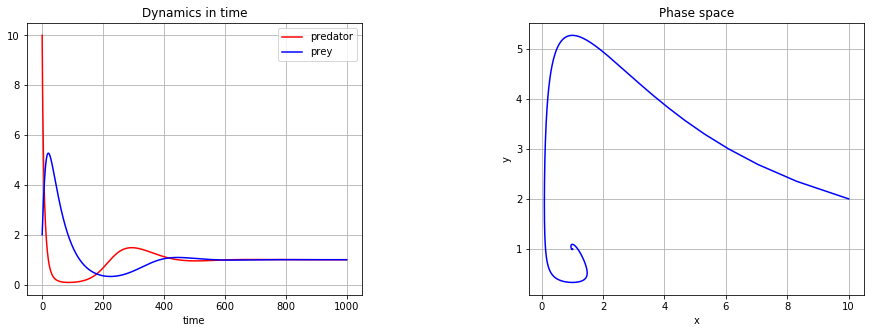

In [11]:
import numpy as np  
from scipy import integrate  
  
# define system in terms of a Numpy array  
def Sys(X, t=0):  
# here X[0] = x and x[1] = y  
    return np.array([ 2*X[0] - X[0]**2 - X[0]*X[1] , - X[1] + X[0]*X[1] ])  
  
# generate 1000 linearly spaced numbers for x-axes  
t = np.linspace(0, 20,  1000)  
# initial values: x0 = 10, y0 = 2  
Sys0 = np.array([10, 2])  
  
# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.  
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)  
# infodict['message']                      # integration successful  
  
x,y = X.T  
  
#plot  
fig = plt.figure(figsize=(15,5))  
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)  
ax1 = fig.add_subplot(1,2,1)  
ax2 = fig.add_subplot(1,2,2)  
  
ax1.plot(x, 'r-', label='predator')  
ax1.plot(y, 'b-', label='prey')  
ax1.set_title("Dynamics in time")  
ax1.set_xlabel("time")  
ax1.grid()  
ax1.legend(loc='best')  
  
ax2.plot(x, y, color="blue")  
ax2.set_xlabel("x")  
ax2.set_ylabel("y")  
ax2.set_title("Phase space")  
ax2.grid()  

In [12]:
import sympy as sm  
# define the system in this way (asuming a predator-prey-system with no negative values)  
# to avoid interference x = r (for resource) and y = c (for consumer)  
r, c = sm.symbols('r, c', negative=False)  
R = 2*r - r**2 - r*c  
C = - c + r*c  
  
# use sympy's way of setting equations to zero  
REqual = sm.Eq(R, 0)  
CEqual = sm.Eq(C, 0)  
  
# compute fixed points  
equilibria = sm.solve( (REqual, CEqual), r, c )  
print(equilibria)  

[(0, 0), (1, 1), (2, 0)]


метода Рунге-Кутты 4-го порядка

хочу построить график, 
показывающий как x, так и y как функцию времени от t = 0 до t = 30.

а = альфа = 1
б = бета = 0,5
г = гамма = 0,5
с = сигма = 2
начальных условия х = у = 2



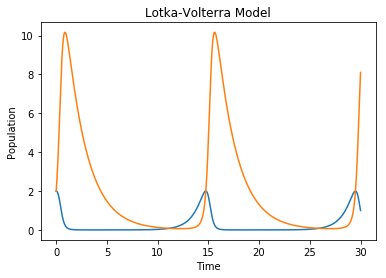

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def rk4(r, t, h):                    #edited; no need for input f
        """ Runge-Kutta 4 method """
        k1 = h*f(r, t)
        k2 = h*f(r+0.5*k1, t+0.5*h)
        k3 = h*f(r+0.5*k2, t+0.5*h)
        k4 = h*f(r+k3, t+h)
        return (k1 + 2*k2 + 2*k3 + k4)/6

def f(r, t):
        alpha = 1.0
        beta = 0.5
        gamma = 0.5
        sigma = 2.0
        x, y = r[0], r[1]
        fxd = x*(alpha - beta*y)
        fyd = -y*(gamma - sigma*x)
        return np.array([fxd, fyd], float)

h=0.001                               #edited
tpoints = np.arange(0, 30, h)         #edited
xpoints, ypoints  = [], []
r = np.array([2, 2], float)
for t in tpoints:
        xpoints.append(r[0])          #edited
        ypoints.append(r[1])          #edited
        r += rk4(r, t, h)             #edited; no need for input f
plt.plot(tpoints, xpoints)
plt.plot(tpoints, ypoints)
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Lotka-Volterra Model")
plt.savefig("Lotka_Volterra.png")
plt.show()


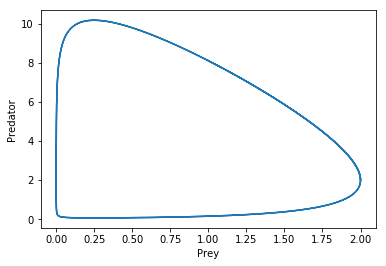

In [17]:
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.plot(xpoints, ypoints)
plt.show()